#Index  

<a href=#bookmark>Working on Form</a>

 <a href=#neighborhood_houses_sold>Neighborhood houses sold chart</a>



In [1002]:
from ipywidgets import Button
import ipywidgets as widgets
print(widgets.Button.on_click.__doc__)

Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        


In [1003]:
b_danger = Button(description='Danger Button', button_style='danger')
output = widgets.Output()

b1 = Button(description='Custom color')
b1.style.button_color = 'lightgreen'
#b1
b_danger
def on_button_clicked(b):
    with output:
        print("Button clicked.")
display(b_danger, output)
b_danger.on_click(on_button_clicked)

Button(button_style='danger', description='Danger Button', style=ButtonStyle())

Output()

In [903]:
# Import Statements
import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split, 
                                     RandomizedSearchCV, 
                                     cross_val_score,
                                     RepeatedStratifiedKFold
                                    )
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier
                             )
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             #roc_auc_score, 
                             #roc_curve, 
                             f1_score
                            )
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder
                                  )
from sklearn.compose import make_column_transformer
from pprint import pprint
from sklearn.pipeline import make_pipeline
from numpy import (mean, 
                   std
                  )
#from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from scipy.stats import mode as sc_mode
#from funct import *

pd.set_option('display.max_columns', None)

%matplotlib inline

In [941]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 60%; }
    div#menubar-container     { width: 60%; }
    div#maintoolbar-container { width: 60%; }
    div.cell.selected {border-left-width: 1px !important; }
    div.output_scroll {resize: vertical !important; }
    
    div.cell{
        width: 1500px; /* altered from 850px*/
        margin-left: -30%!important; /*altered from 10%*/
        margin-right: 15%; /*altered from auto%*/
        font-family: "Open sans",verdana,arial,sans-serif;
        line-height: 135%;
        font-size: 105%;
        
        margin-left:auto;
        margin-right:auto;
        text-align:justify;
        text-justify:inter-word;
        font:
    }
    h1 {
        font-family: "Open sans",verdana,arial,sans-serif;
    }
    .text_cell_render h1 {
        font-weight: 200;
        font-size: 40pt;
        line-height: 100%;
        color:#447adb;
        margin-bottom: 0em;
        margin-top: 0em;
        display: block;
        white-space: nowrap;
    } 
    div.text_cell_render{
        font-family: "Open sans",verdana,arial,sans-serif;
        line-height: 135%;
        font-size: 225%;
        width:750px; /* altered from 750px */
        margin-left:auto;
        margin-right:auto;
        text-align:justify;
        text-justify:inter-word;
    }
</style>
"""))

In [942]:
def hello_world():
    return 'Hello World'

In [943]:
hello_world()

'Hello World'

In [944]:
replace_na_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
                  'GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageYrBlt',
                  'GarageQual', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                  'BsmtFinType2'
                 ]
fields_to_drop = ['LotFrontage', 'GarageYrBlt', 'Utilities', 'Street', 'GarageArea',
                      'YearRemodAdd', 'BsmtFinSF1', 'ScreenPorch', 'EnclosedPorch', 'Alley',
                      'Utilities', 'SaleType', '3SsnPorch', 'Exterior1st', 'Exterior2nd',
                      'Condition1', 'Condition2', 'PoolArea', 'Functional', 'RoofMatl',
                      'RoofStyle', 'Electrical', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
                      'PoolQC', 'HeatingQC', 'BsmtExposure', 'PoolQC', 'BsmtUnfSF', 
                      'SaleCondition', 'LotConfig', 'TotalBsmtSF', 'MSSubClass', 'LowQualFinSF',
                      'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'LandSlope',
                      'WoodDeckSF'
                     ]
fields_to_drop_sm = ['LotFrontage', 'GarageYrBlt']


In [945]:
def unique_counts (df):
    ret = []
    ret = pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype) for col in df.columns],
                          columns=['Column', 'Num_Unique', 'type']).sort_values(by=['Num_Unique'])
    return ret

def convert_to_cat(df, type_):
    unique_ = unique_counts(df)
    for col in unique_['Column'].loc[unique_['Num_Unique']<20]:
        if df[col].dtype == type_:
            #if unique_[col].loc[unique_['Num_Unique']<20]:
        #train_x[col] = pd.cut(train_x[col], bins=4, labels=[col+'_low', col+'_mid', col+'_high', col+'_very_high'])
            df[col] = df[col].astype('str').astype('category')
    for col in unique_['Column'].loc[unique_['Num_Unique']>=20]:
        if df[col].dtype == type_:
            df[col] = pd.qcut(df[col], 6, duplicates='drop')#bins=4, labels=['_low', '_mid', '_high', '_very_high'])
            df[col] = df[col].astype('str').astype('category')
    return df


def change_missing(df, col_=replace_na_col, val='NA'):
    df[col_] = df[col_].replace({np.nan: val})
    return df

def cond_condense_rooms(cond_, expand=True):
        cond_ = int(cond_)
        if expand:
            return cond_
        if cond_ < 3:
            return 1
        if cond_ < 5:
            return 2
        if cond_ < 10:
            return 3
        else:
            return 0
        
def cond_tot_rooms(cond_, expand=True):
    cond_ = int(cond_)
    if expand:
        return cond_
    if cond_ < 5:
        return 1
    if cond_ < 7:
        return 2
    if cond_ < 10:
        return 3
    else:
        return 4    

def qu_condense(cond_, expand=True):
    if expand:
        if cond_ == 'Ex':
            return 4
        elif cond_ == 'Gd':
            return 3
        elif cond_ == 'TA':
            return 2
        elif cond_ == 'Fa':
            return 1
        else:
            return 0
    else:
        if cond_ in ['Ex', 'Gd']:
            return 3
        if cond_ == 'TA':
            return 2
        if cond_ in ['Fa', 'Po']:
            return 1
        else:
            return 0

def cond_condenser(cond_, expand=True):
    cond_ = int(cond_)
    if expand:
        return cond_
    if cond_ < 3:
        return 1
    elif cond_ < 6:
        return 2
    elif cond_ < 7:
        return 3
    elif cond_ <9:
        return 4
    elif cond_ < 11:
        return 5
    else:
        return 0


In [946]:
# create a setup function that gets the data in the structure I need
def data_load():
    ''' Basic data load and setup. Just loading one of the files - train.csv, splitting
    into a train_x and train_y. Bin some of the data and delete a bunch of the columns
    that after many iterations, didn't need to be included. All data becomes category data
    '''
    import pandas as pd
    train = pd.read_csv('data/train.csv')
    train_x = train.iloc[:,:-1].drop('Id', axis=1)
    fields_ = ['MasVnrArea', 'Electrical', 'MSZoning', 'Functional', 'Utilities']
    
    val_ = []
    for f in (fields_):
        train_x[f] = train_x[f].fillna(train_x[f].mode()[0])
        
    train_y = train.iloc[:,-1]
    train_x = change_missing(train_x)
     
    # bin y
    bin_ = (np.linspace(0, 800000, 32))
    #bin_ = np.concatenate((np.linspace(25000, 450000, 9),np.array([500000, 550000, 600000, 800000]) ) )
    y_cat_type = pd.CategoricalDtype(categories=list(range(0,len(bin_)-1)), ordered=True)
    #train_y = pd.cut(train_y, bins=bin_).astype('str').astype('category')
    train_y = pd.cut(train_y, bins=bin_, labels=list(range(0,len(bin_)-1))).astype(y_cat_type)
       
    for col_ in ['FireplaceQu', 'KitchenQual', 'BsmtCond', 'ExterCond', 'ExterCond',
                 'BsmtQual', 'GarageCond', 'GarageQual']:
        train_x[col_] = train_x[col_].apply(lambda x: qu_condense(x))  
    train_x['OverallCond'] = train_x['OverallCond'].apply(lambda x: cond_condenser(x))
    train_x['OverallQual'] = train_x['OverallQual'].apply(lambda x: cond_condenser(x))
    train_x['BedroomAbvGr'] = train_x['BedroomAbvGr'].apply(lambda x: cond_condense_rooms(x))
    train_x['TotRmsAbvGrd'] = train_x['TotRmsAbvGrd'].apply(lambda x: cond_tot_rooms(x))   
    for col in train_x:
        if train_x[col].dtype == 'object':
            train_x[col] = train_x[col].astype('str').astype('category')
            #train_x[col] = train_x[col].astype(CategoricalDtype(list(0:len()))).astype('category')
#     for col in test_x:
#         if test_x[col].dtype == 'object':
#             test_x[col] = test_x[col].astype('str').astype('category')
    # bin the data
    train_x['LotShape'] = train_x['LotShape'].apply(lambda x: '1' if x == 'Reg' else '0')
    train_x = convert_to_cat(train_x, 'int64')
    train_x = convert_to_cat(train_x, 'float64')
    train_x = train_x.drop(fields_to_drop, axis=1)
    return train_x, train_y, train

def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)

def by_cat_dist_plot(data_column, name_):
    ax=data_column.value_counts().plot(kind = 'bar',  
                                                  figsize=(9,6)) #.sort_index() after counts()
    ax.set_title(name_, fontname='Comic Sans MS', fontsize=20)




In [947]:
# using the data_load function to get the data as I need it for this part of the project
train_x, train_y, train_raw = data_load()

In [948]:
(train_y)

0        8
1        7
2        8
3        5
4        9
        ..
1455     6
1456     8
1457    10
1458     5
1459     5
Name: SalePrice, Length: 1460, dtype: category
Categories (31, int64): [0 < 1 < 2 < 3 ... 27 < 28 < 29 < 30]

In [949]:
# Finding the Neighborhoods with the highest number of counts
# will take top 3 neighborhoods and will do all neighborhoods including top 3
train_x.groupby('Neighborhood')['OverallCond'].count().sort_values(ascending=False).head(15).reset_index()

,Neighborhood,OverallCond
0,NAmes,225
1,CollgCr,150
2,OldTown,113
3,Edwards,100
4,Somerst,86
5,Gilbert,79
6,NridgHt,77
7,Sawyer,74
8,NWAmes,73
9,SawyerW,59


In [950]:
# looking at the number of unique values per category

pd.DataFrame.from_records([(col, train_x[col].nunique()) for col in train_x.columns],
                          columns=['Column', 'Num_Unique']).sort_values(by=['Num_Unique'])

,Column,Num_Unique
39,MiscVal,1
13,ExterCond,1
2,LotShape,2
18,CentralAir,2
20,2ndFlrSF,3
23,HalfBath,3
35,PavedDrive,3
11,MasVnrArea,3
12,ExterQual,4
31,GarageFinish,4


from the random grid search I did

{'n_estimators': 1700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 36,
 'max_features': 0.2,
 'max_depth': 4,
 'bootstrap': True}

In [951]:
# setup classifier these parameters were created from numerous runs on the full data set
# for testing set true, else false for full run
quick_ = False
if quick_:
    rf_classifier = RandomForestClassifier(
                      min_samples_leaf=2,
                      min_samples_split=10,
                      n_estimators=700,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=22,
                      max_depth=2,
                      max_features=5)
else:
    rf_classifier = RandomForestClassifier(
                      min_samples_leaf=2,
                      min_samples_split=10,
                      n_estimators=1700,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=22,
                      max_depth=4,
                      max_features=5)

# rf_classifier = RandomForestClassifier(
#                       min_samples_leaf=10,
#                       n_estimators=val_[0],
#                       bootstrap=True,
#                       oob_score=True,
#                       n_jobs=-1,
#                       random_state=22,
#                       max_features=val_[1])

In [952]:
'''making copy of the train_x data so I don't change it during this process - also adding
the saleprice back in so that when I group data it will all be matched'''

train_xy=train_x.copy()
train_xy['SalePrice'] =train_y
train_xy

,MSZoning,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,Heating,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,OpenPorchSF,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,RL,"(8400.0, 9478.5]",1,Lvl,CollgCr,1Fam,2Story,7,5,"(1994.0, 2004.0]",BrkFace,"(93.333, 243.833]",Gd,0,PConc,3,2,GasA,Y,"(816.0, 948.333]","(846.0, 2065.0]","(1664.667, 1958.0]",2,1,3,1,3,8,0,0,Attchd,RFn,2,2,2,Y,"(50.0, 98.0]",NA,NA,"(-0.001, 15500.0]",2,2008,8
1,RL,"(9478.5, 10766.0]",1,Lvl,Veenker,1Fam,1Story,6,8,"(1973.0, 1994.0]",None,"(-0.001, 93.333]",TA,0,CBlock,3,2,GasA,Y,"(1087.0, 1266.0]","(-0.001, 600.0]","(1242.667, 1464.0]",2,0,3,1,2,6,1,2,Attchd,RFn,2,2,2,Y,"(-0.001, 25.0]",NA,NA,"(-0.001, 15500.0]",5,2007,7
2,RL,"(10766.0, 12799.667]",0,Lvl,CollgCr,1Fam,2Story,7,5,"(1994.0, 2004.0]",BrkFace,"(93.333, 243.833]",Gd,0,PConc,3,2,GasA,Y,"(816.0, 948.333]","(846.0, 2065.0]","(1664.667, 1958.0]",2,1,3,1,3,6,1,2,Attchd,RFn,2,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",9,2008,8
3,RL,"(9478.5, 10766.0]",0,Lvl,Crawfor,1Fam,2Story,7,5,"(1871.999, 1940.0]",None,"(-0.001, 93.333]",TA,0,BrkTil,2,3,GasA,Y,"(948.333, 1087.0]","(600.0, 846.0]","(1664.667, 1958.0]",1,0,3,1,3,7,1,3,Detchd,Unf,3,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",2,2006,5
4,RL,"(12799.667, 215245.0]",0,Lvl,NoRidge,1Fam,2Story,8,5,"(1994.0, 2004.0]",BrkFace,"(243.833, 1600.0]",Gd,0,PConc,3,2,GasA,Y,"(1087.0, 1266.0]","(846.0, 2065.0]","(1958.0, 5642.0]",2,1,4,1,3,9,1,2,Attchd,RFn,3,2,2,Y,"(50.0, 98.0]",NA,NA,"(-0.001, 15500.0]",12,2008,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,"(6405.0, 8400.0]",1,Lvl,Gilbert,1Fam,2Story,6,5,"(1994.0, 2004.0]",None,"(-0.001, 93.333]",TA,0,PConc,3,2,GasA,Y,"(948.333, 1087.0]","(600.0, 846.0]","(1464.0, 1664.667]",2,1,3,1,2,7,1,2,Attchd,RFn,2,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",8,2007,6
1456,RL,"(12799.667, 215245.0]",1,Lvl,NWAmes,1Fam,1Story,6,6,"(1973.0, 1994.0]",Stone,"(93.333, 243.833]",TA,0,CBlock,3,2,GasA,Y,"(1535.833, 4692.0]","(-0.001, 600.0]","(1958.0, 5642.0]",2,0,3,1,2,7,2,2,Attchd,Unf,2,2,2,Y,"(-0.001, 25.0]",MnPrv,NA,"(-0.001, 15500.0]",2,2010,8
1457,RL,"(8400.0, 9478.5]",1,Lvl,Crawfor,1Fam,2Story,7,9,"(1940.0, 1960.0]",None,"(-0.001, 93.333]",Ex,0,Stone,2,3,GasA,Y,"(1087.0, 1266.0]","(846.0, 2065.0]","(1958.0, 5642.0]",2,0,4,1,3,9,2,3,Attchd,RFn,1,2,2,Y,"(50.0, 98.0]",GdPrv,Shed,"(-0.001, 15500.0]",5,2010,10
1458,RL,"(9478.5, 10766.0]",1,Lvl,NAmes,1Fam,1Story,5,6,"(1940.0, 1960.0]",None,"(-0.001, 93.333]",TA,0,CBlock,2,2,GasA,Y,"(948.333, 1087.0]","(-0.001, 600.0]","(1026.0, 1242.667]",1,0,2,1,3,5,0,0,Attchd,Unf,1,2,2,Y,"(-0.001, 25.0]",NA,NA,"(-0.001, 15500.0]",4,2010,5


<AxesSubplot:>

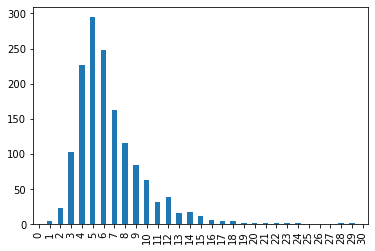

In [953]:
train_xy['SalePrice'].value_counts().sort_index().plot(kind = 'bar')

In [954]:
def top_feature_plot(feature_imp_ranked_, num=20):    
    feature_names_ = [i[0] for i in feature_imp_ranked_[:num]]
    y_ticks = np.arange(0, len(feature_names_))
    x_axis = [i[1] for i in feature_imp_ranked_[:num]]
    plt.figure(figsize = (10, 10))
    plt.barh(feature_names_, x_axis)   #horizontal barplot
    plt.title('Random Forest Feature Importance',
              fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
    plt.xlabel('Features',fontdict= {'fontsize' : 16})
    plt.show()

In [955]:
def feature_imp_lst(enc_, imp_, num=num_):
    feature_importances_ = list(zip(enc_, imp_))    
    feature_importances_ranked_ = sorted(feature_importances_, key = lambda x: x[1], reverse = True)
    [print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked_[:num]]; 
    return feature_importances_ranked_

    

In [956]:
feature_importances_ranked_

[('ExterQual_TA', 0.04077753992025949),
 ('FullBath_1', 0.03786231743874378),
 ('FullBath_2', 0.03539196614234247),
 ('ExterQual_Gd', 0.03394096397786369),
 ('KitchenQual_2', 0.031830039090380444),
 ('GrLivArea_(333.999, 1026.0]', 0.026097345724143076),
 ('KitchenQual_3', 0.02522215793993021),
 ('GarageCars_2', 0.025140019571696),
 ('Foundation_PConc', 0.023967390813889204),
 ('BsmtQual_2', 0.02228816432434007),
 ('GarageType_Attchd', 0.02207267901747973),
 ('BsmtQual_3', 0.0213139094998593),
 ('GarageFinish_Unf', 0.020553047120608788),
 ('GrLivArea_(1958.0, 5642.0]', 0.019540704010499635),
 ('GarageCars_3', 0.018953493178431077),
 ('OverallQual_7', 0.0189055049525403),
 ('FireplaceQu_0', 0.018255308426503723),
 ('GarageCars_1', 0.018215141353820047),
 ('OverallQual_8', 0.018202558744537058),
 ('Fireplaces_0', 0.017642068665362227),
 ('GarageType_Detchd', 0.01636059468392241),
 ('OpenPorchSF_(-0.001, 25.0]', 0.01570571873384568),
 ('2ndFlrSF_(846.0, 2065.0]', 0.015373757077435764),
 ('

In [957]:
def sum_dict(dict_):
    return {k: sum(v) for k,v in dict_.items()}

def sort_dict(dict_):
    return {k: dict_[k] for k in sorted(dict_, key=dict_.get, reverse=True)}

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


NAmes
 There are 177 features in total
Feature: Heating_OthW                        Importance: 0.02956587138158895
Feature: BsmtQual_3                          Importance: 0.029477192888448682
Feature: BedroomAbvGr_5                      Importance: 0.027303171473419895
Feature: HouseStyle_SFoyer                   Importance: 0.026181495772623242
Feature: TotRmsAbvGrd_5                      Importance: 0.02532321237926328
Feature: HouseStyle_SLvl                     Importance: 0.023892180831079628
Feature: BedroomAbvGr_1                      Importance: 0.02330697853992047
Feature: TotRmsAbvGrd_4                      Importance: 0.022407916503779678
Feature: YearBuilt_(1871.999, 1940.0]        Importance: 0.020415927127071427
Feature: TotRmsAbvGrd_14                     Importance: 0.01885066028645889


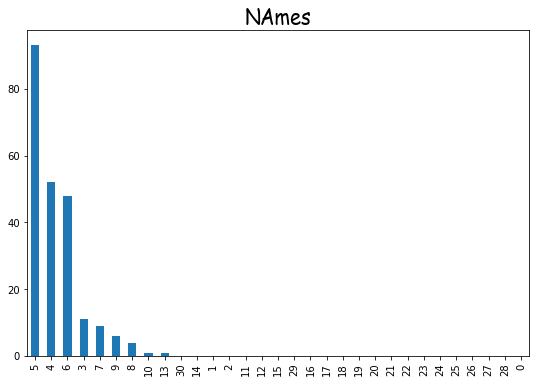

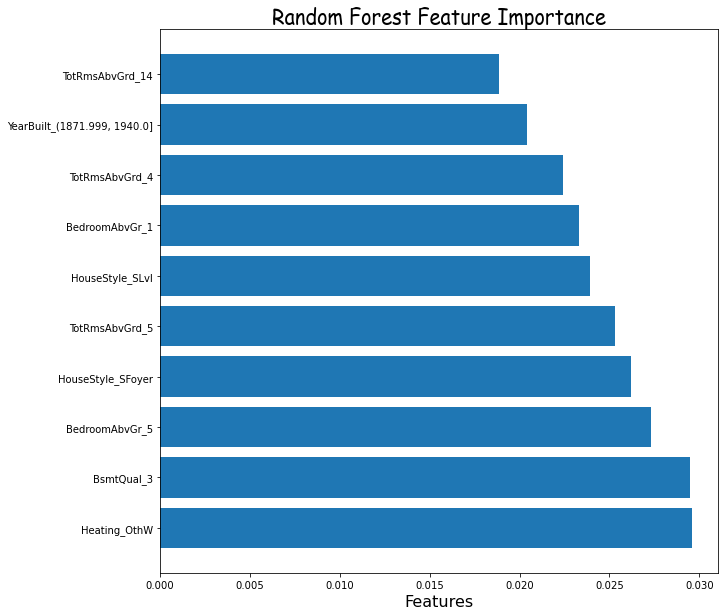

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


CollgCr
 There are 143 features in total
Feature: Foundation_Slab                     Importance: 0.047187535802983044
Feature: HouseStyle_2.5Unf                   Importance: 0.04433314511462232
Feature: Foundation_PConc                    Importance: 0.04233682660996939
Feature: Foundation_Stone                    Importance: 0.041721734847600084
Feature: BedroomAbvGr_8                      Importance: 0.035382592807447086
Feature: HouseStyle_1Story                   Importance: 0.03387513851169091
Feature: BsmtCond_3                          Importance: 0.023782210159892285
Feature: BsmtCond_2                          Importance: 0.02199678646930856
Feature: FullBath_2                          Importance: 0.021282549135093313
Feature: OverallCond_8                       Importance: 0.02085410590966062


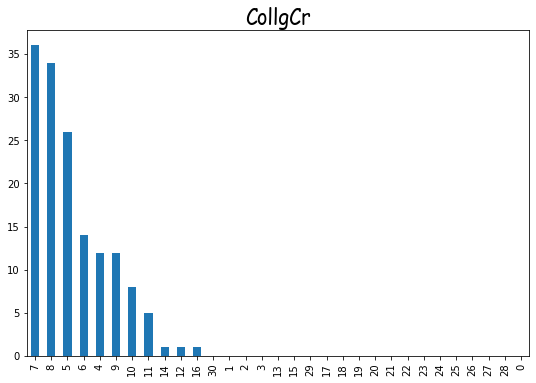

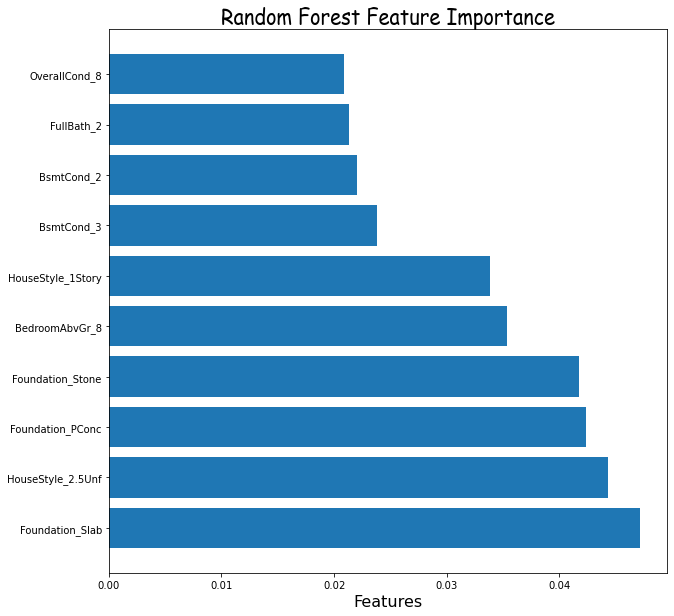

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


OldTown
 There are 175 features in total
Feature: OverallQual_10                      Importance: 0.023977949122136546
Feature: BedroomAbvGr_4                      Importance: 0.023174167383925397
Feature: BedroomAbvGr_5                      Importance: 0.019217023535005498
Feature: Heating_Grav                        Importance: 0.01901487115956439
Feature: BedroomAbvGr_8                      Importance: 0.018548512001556838
Feature: TotRmsAbvGrd_5                      Importance: 0.016564942306536136
Feature: BsmtCond_1                          Importance: 0.016361068860539667
Feature: 2ndFlrSF_(-0.001, 600.0]            Importance: 0.015478337810871228
Feature: MasVnrType_BrkFace                  Importance: 0.015213761265303981
Feature: 1stFlrSF_(1535.833, 4692.0]         Importance: 0.015084437061998943


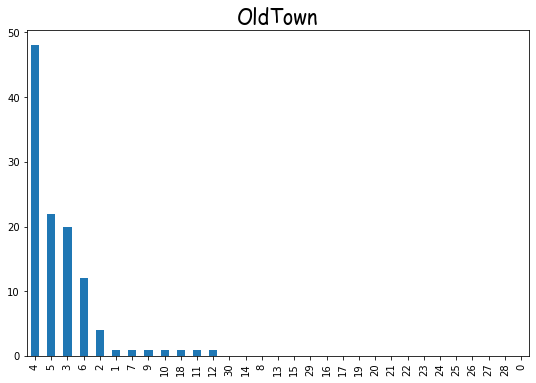

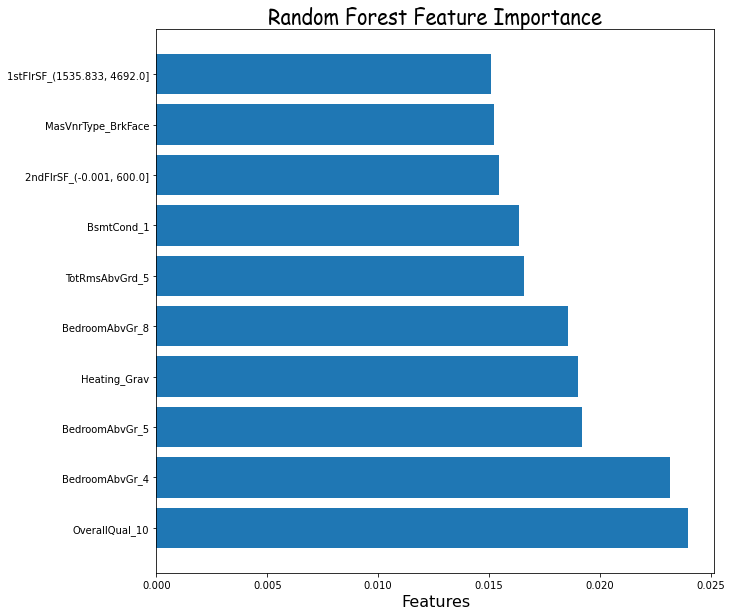

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


ALL
 There are 206 features in total
Feature: FullBath_1                          Importance: 0.03618393496504805
Feature: ExterQual_TA                        Importance: 0.03518997920712233
Feature: FullBath_2                          Importance: 0.03181908943118619
Feature: ExterQual_Gd                        Importance: 0.027723407496932424
Feature: KitchenQual_2                       Importance: 0.027216936532668424
Feature: GarageCars_2                        Importance: 0.024789204394633352
Feature: BsmtQual_2                          Importance: 0.02453176375717969
Feature: GarageCars_1                        Importance: 0.02392220910235351
Feature: GarageFinish_Unf                    Importance: 0.023381503989299286
Feature: Foundation_PConc                    Importance: 0.021940902240719626


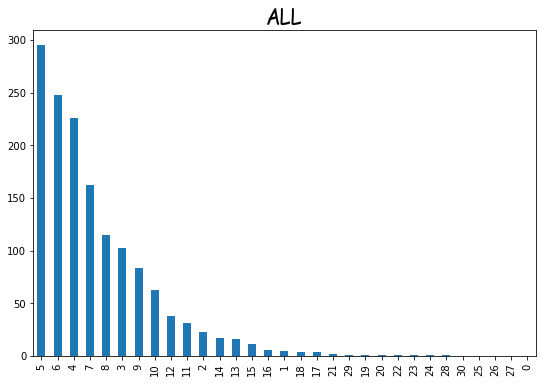

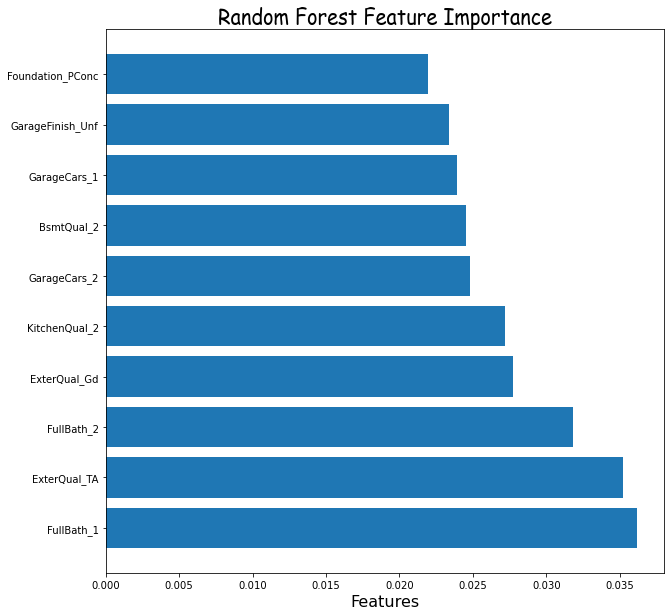

In [958]:
# declare dictionare that gets created of features
cat_t = {}
top_features = []
top_ = ['NAmes', 'CollgCr', 'OldTown', 'ALL']#, 'Edwards', 'Somerst']
top_dicts = []
for name in top_:
    if name == 'ALL':
        name_ = train_xy
    else:
        name_ = train_xy.loc[train_xy['Neighborhood'] == name].reset_index(drop=True)
    # why I drop the Nieghborhood? it's because so much of the other variables are baked
    # into the neighborhood, that it overfits the data too easily (other option would be to
    # drop other related columns or decrease the weight -)
    t_x = name_.iloc[:,1:].drop(['Neighborhood', 'SalePrice'], axis=1)
    t_y = name_.iloc[:,-1:]

    col_trans = make_column_transformer(
                        (OneHotEncoder(),t_x.columns.tolist()),
                        remainder = "passthrough"
                        )
    pipe = make_pipeline(col_trans, rf_classifier)
    pipe.fit(t_x, t_y)
    print(name)
    by_cat_dist_plot(t_y['SalePrice'], name)
    #t_y['SalePrice'].value_counts().sort_index().plot(kind = 'bar', title=name, figsize=(9,6))
    print(f" There are {len(rf_classifier.feature_importances_)} features in total")
    X_t_encoded = encode_and_bind(t_x, t_x.columns.tolist())
    feature_importances_ranked_ = feature_imp_lst(X_t_encoded, rf_classifier.feature_importances_)
    top_features.append([name, feature_importances_ranked_])
    top_feature_plot(feature_importances_ranked_, 10)
    
    
# Dictionary of Features and importances greater than .0001
# cat_ dict is all results top_five_dicts is list of dictionaries by neighborhood
    cat_new = {}
    for feat in feature_importances_ranked_[:35]:     
        if feat[1] > 0.0001:
            cat_t.setdefault(feat[0].split(sep='_')[0], []).append(feat[1])
            cat_new.setdefault(feat[0].split(sep='_')[0], []).append(feat[1])
    top_dicts.append(cat_new)

In [959]:
sort_dict(cat_new)

{'FullBath': [0.03618393496504805, 0.03181908943118619],
 'ExterQual': [0.03518997920712233, 0.027723407496932424],
 'KitchenQual': [0.027216936532668424, 0.020795644247627178],
 'GarageCars': [0.024789204394633352,
  0.02392220910235351,
  0.014046065183448135],
 'BsmtQual': [0.02453176375717969, 0.02110050861762343],
 'GarageFinish': [0.023381503989299286],
 'Foundation': [0.021940902240719626, 0.012947700198532332],
 'GrLivArea': [0.021881510792509752, 0.01384490703786767],
 'OverallQual': [0.020995956695731604,
  0.017640641287070123,
  0.015001863973294425,
  0.010193322287837394],
 'FireplaceQu': [0.020524249414948615],
 'Fireplaces': [0.02015835681746808, 0.012742911253700816],
 'GarageType': [0.01714368213136128, 0.016360615449125735],
 'OpenPorchSF': [0.013020342685360179],
 '2ndFlrSF': [0.012153835565999655, 0.01196072871005314, 0.01064219304174576],
 'HalfBath': [0.010082985951400622, 0.009531187195354522],
 'YearBuilt': [0.009966177407568368, 0.008878543505265304],
 '1stFlr

In [960]:
count_=[]
tot_=[]
for val in top_dicts:
    print(val)
    print('*'*100)
    val = sum_dict(val)
    
    for k,v in sort_dict(val).items():
        print(k,v)
        count_.append(k)
    print('*'*100)

{'Heating': [0.02956587138158895, 0.015674498824130474, 0.013063859837685272, 0.011363075282745255], 'BsmtQual': [0.029477192888448682, 0.010941654416575264], 'BedroomAbvGr': [0.027303171473419895, 0.02330697853992047], 'HouseStyle': [0.026181495772623242, 0.023892180831079628, 0.018768795973290408], 'TotRmsAbvGrd': [0.02532321237926328, 0.022407916503779678, 0.01885066028645889, 0.01533757287174798], 'YearBuilt': [0.020415927127071427], 'OverallCond': [0.017630566615664266, 0.016721364499092777, 0.014926958931358375, 0.013766263055514795, 0.013691040111994405], 'KitchenQual': [0.01643910372311314], 'MasVnrArea': [0.01619367399956212], 'FullBath': [0.015981505674615336], 'BsmtCond': [0.015978418190799402], 'HalfBath': [0.015974354843292026], 'KitchenAbvGr': [0.014728329454274205, 0.014034116091773312], 'ExterQual': [0.014195611167252088, 0.01338297641039367], 'CentralAir': [0.013436958904991934, 0.011809427523418535], '1stFlrSF': [0.012105826259692169, 0.010711762532002239], 'LotArea':

In [961]:
train_xy

,MSZoning,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,Heating,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,OpenPorchSF,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,RL,"(8400.0, 9478.5]",1,Lvl,CollgCr,1Fam,2Story,7,5,"(1994.0, 2004.0]",BrkFace,"(93.333, 243.833]",Gd,0,PConc,3,2,GasA,Y,"(816.0, 948.333]","(846.0, 2065.0]","(1664.667, 1958.0]",2,1,3,1,3,8,0,0,Attchd,RFn,2,2,2,Y,"(50.0, 98.0]",NA,NA,"(-0.001, 15500.0]",2,2008,8
1,RL,"(9478.5, 10766.0]",1,Lvl,Veenker,1Fam,1Story,6,8,"(1973.0, 1994.0]",None,"(-0.001, 93.333]",TA,0,CBlock,3,2,GasA,Y,"(1087.0, 1266.0]","(-0.001, 600.0]","(1242.667, 1464.0]",2,0,3,1,2,6,1,2,Attchd,RFn,2,2,2,Y,"(-0.001, 25.0]",NA,NA,"(-0.001, 15500.0]",5,2007,7
2,RL,"(10766.0, 12799.667]",0,Lvl,CollgCr,1Fam,2Story,7,5,"(1994.0, 2004.0]",BrkFace,"(93.333, 243.833]",Gd,0,PConc,3,2,GasA,Y,"(816.0, 948.333]","(846.0, 2065.0]","(1664.667, 1958.0]",2,1,3,1,3,6,1,2,Attchd,RFn,2,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",9,2008,8
3,RL,"(9478.5, 10766.0]",0,Lvl,Crawfor,1Fam,2Story,7,5,"(1871.999, 1940.0]",None,"(-0.001, 93.333]",TA,0,BrkTil,2,3,GasA,Y,"(948.333, 1087.0]","(600.0, 846.0]","(1664.667, 1958.0]",1,0,3,1,3,7,1,3,Detchd,Unf,3,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",2,2006,5
4,RL,"(12799.667, 215245.0]",0,Lvl,NoRidge,1Fam,2Story,8,5,"(1994.0, 2004.0]",BrkFace,"(243.833, 1600.0]",Gd,0,PConc,3,2,GasA,Y,"(1087.0, 1266.0]","(846.0, 2065.0]","(1958.0, 5642.0]",2,1,4,1,3,9,1,2,Attchd,RFn,3,2,2,Y,"(50.0, 98.0]",NA,NA,"(-0.001, 15500.0]",12,2008,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,"(6405.0, 8400.0]",1,Lvl,Gilbert,1Fam,2Story,6,5,"(1994.0, 2004.0]",None,"(-0.001, 93.333]",TA,0,PConc,3,2,GasA,Y,"(948.333, 1087.0]","(600.0, 846.0]","(1464.0, 1664.667]",2,1,3,1,2,7,1,2,Attchd,RFn,2,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",8,2007,6
1456,RL,"(12799.667, 215245.0]",1,Lvl,NWAmes,1Fam,1Story,6,6,"(1973.0, 1994.0]",Stone,"(93.333, 243.833]",TA,0,CBlock,3,2,GasA,Y,"(1535.833, 4692.0]","(-0.001, 600.0]","(1958.0, 5642.0]",2,0,3,1,2,7,2,2,Attchd,Unf,2,2,2,Y,"(-0.001, 25.0]",MnPrv,NA,"(-0.001, 15500.0]",2,2010,8
1457,RL,"(8400.0, 9478.5]",1,Lvl,Crawfor,1Fam,2Story,7,9,"(1940.0, 1960.0]",None,"(-0.001, 93.333]",Ex,0,Stone,2,3,GasA,Y,"(1087.0, 1266.0]","(846.0, 2065.0]","(1958.0, 5642.0]",2,0,4,1,3,9,2,3,Attchd,RFn,1,2,2,Y,"(50.0, 98.0]",GdPrv,Shed,"(-0.001, 15500.0]",5,2010,10
1458,RL,"(9478.5, 10766.0]",1,Lvl,NAmes,1Fam,1Story,5,6,"(1940.0, 1960.0]",None,"(-0.001, 93.333]",TA,0,CBlock,2,2,GasA,Y,"(948.333, 1087.0]","(-0.001, 600.0]","(1026.0, 1242.667]",1,0,2,1,3,5,0,0,Attchd,Unf,1,2,2,Y,"(-0.001, 25.0]",NA,NA,"(-0.001, 15500.0]",4,2010,5


          factor                  value  count  mean_price       min  \
0    OverallQual                      1      1     61000.0   61000.0   
1    OverallQual                     10      4    286188.0  160000.0   
2    OverallQual                      3     14     92248.0   37900.0   
3    OverallQual                      4     63    108908.0   52500.0   
4    OverallQual                      5    226    130134.0   60000.0   
5    OverallQual                      6    143    152780.0   79000.0   
6    OverallQual                      7    104    199736.0  116900.0   
7    OverallQual                      8     29    250901.0  122000.0   
8    OverallQual                      9      4    289250.0  239000.0   
9    OverallCond                      1      1     61000.0   61000.0   
10   OverallCond                      2      1     87000.0   87000.0   
11   OverallCond                      3     15    103367.0   58500.0   
12   OverallCond                      4     30    116970.0   525

In [963]:
train_xy['SalePrice_real']= train_raw['SalePrice']

In [964]:
print(train_xy.groupby('Neighborhood', dropna=True).agg(agg_setup).round())
                  #.agg({'Neighborhood':'count', 'SalePrice_real': ['mean', 'min', 'max', 'std'], 
                  #                                                 'SalePrice': sc_mode}))

             GarageQual SalePrice_real                                    \
                  count           mean  median     min     max       std   
Neighborhood                                                               
Blmngtn              17       194871.0  191000  159895  264561   30393.0   
Blueste               2       137500.0  137500  124000  151000   19092.0   
BrDale               16       104494.0  106000   83000  125000   14330.0   
BrkSide              58       124834.0  124300   39300  223500   40349.0   
ClearCr              28       212565.0  200250  130000  328000   50232.0   
CollgCr             150       197966.0  197200  110000  424870   51404.0   
Crawfor              51       210625.0  200624   90350  392500   68866.0   
Edwards             100       128220.0  121750   58500  320000   43209.0   
Gilbert              79       192855.0  181000  141000  377500   35987.0   
IDOTRR               37       100124.0  103000   34900  169500   33377.0   
MeadowV     

In [965]:
#val_dict = sum_dict(top_dicts[0:2])
train_xy['SalePrice_real']= train_raw['SalePrice']
train_xy['SalePrice'] = train_y#['SalePrice']
agg_setup = ({k:'count', 'SalePrice_real': ['mean', 'median', 'min', 'max', 'std'], 'SalePrice': sc_mode})
agg_setup_raw = ({k:'count', 'SalePrice': ['mean', 'min', 'max', 'std'], 'SalePrice': sc_mode})
def dict_value_mean(dict_, neigh_):
    for k,v in sort_dict(dict_).items():
        print(neigh_, k, v)
        if neigh_ == 'ALL':
            print(train_xy.groupby(k, dropna=True)
                  .agg(agg_setup).round(0))#count())
            print(train_raw.groupby(k, dropna=True)
                  .agg(agg_setup_raw))
            
        else:
            print(train_xy.loc[train_xy['Neighborhood']==neigh_][['Neighborhood','SalePrice_real', k]].groupby(k)
                 # .agg(agg_setup))#
                  .agg({k:'count', 'SalePrice_real': 'mean'}))#count())
            print(train_raw.loc[train_x['Neighborhood']==neigh_][['Neighborhood','SalePrice', k]].groupby(k, dropna=True)
                  .agg({k:'count', 'SalePrice': 'mean'}))
    print('*'*100)

In [966]:
for n in range(0,len(top_)):
    val_dict = sum_dict(top_dicts[n])
    dict_value_mean(val_dict, top_[n])


NAmes TotRmsAbvGrd 0.08191936204124983
              TotRmsAbvGrd  SalePrice_real
TotRmsAbvGrd                              
10                       4   134900.000000
11                       1   242000.000000
12                       2   177150.000000
14                       0             NaN
2                        0             NaN
3                        0             NaN
4                       15   123540.666667
5                       57   129734.789474
6                       94   143401.063830
7                       32   158900.000000
8                       14   190235.714286
9                        6   200650.000000
              TotRmsAbvGrd      SalePrice
TotRmsAbvGrd                             
4                       15  123540.666667
5                       57  129734.789474
6                       94  143401.063830
7                       32  158900.000000
8                       14  190235.714286
9                        6  200650.000000
10                     

            HouseStyle  SalePrice_real
HouseStyle                            
1.5Fin               0             NaN
1.5Unf               0             NaN
1Story              91   186709.582418
2.5Fin               0             NaN
2.5Unf               0             NaN
2Story              53   223773.471698
SFoyer               3   138300.000000
SLvl                 3   143133.333333
            HouseStyle      SalePrice
HouseStyle                           
1Story              91  186709.582418
2Story              53  223773.471698
SFoyer               3  138300.000000
SLvl                 3  143133.333333
CollgCr OverallCond 0.07949094069948637
             OverallCond  SalePrice_real
OverallCond                             
1                      0             NaN
2                      0             NaN
3                      0             NaN
4                      0             NaN
5                    128   206162.234375
6                     11   160613.636364
7             

              BedroomAbvGr  SalePrice_real
BedroomAbvGr                              
0                        1   144000.000000
1                        1   103200.000000
2                       47   109741.510638
3                       38   138729.710526
4                       21   148056.142857
5                        5   140700.000000
6                        0             NaN
8                        0             NaN
              BedroomAbvGr      SalePrice
BedroomAbvGr                             
0                        1  144000.000000
1                        1  103200.000000
2                       47  109741.510638
3                       38  138729.710526
4                       21  148056.142857
5                        5  140700.000000
OldTown Heating 0.05139903430331111
         Heating  SalePrice_real
Heating                         
Floor          0             NaN
GasA         101   127754.257426
GasW           8   155547.375000
Grav           2    45200.000000


[74 rows x 2 columns]
OldTown MasVnrArea 0.009699288018785378
                   MasVnrArea  SalePrice_real
MasVnrArea                                   
(-0.001, 93.333]          108   128564.703704
(243.833, 1600.0]           4   116117.750000
(93.333, 243.833]           1   140000.000000
            MasVnrArea      SalePrice
MasVnrArea                           
0.0                108  128564.703704
180.0                1  140000.000000
294.0                1  119000.000000
335.0                1  131500.000000
360.0                1  124500.000000
435.0                1   89471.000000
OldTown FullBath 0.00967163655497066
          FullBath  SalePrice_real
FullBath                          
0                1   144000.000000
1               75   117073.453333
2               35   141284.285714
3                2   310000.000000
          FullBath      SalePrice
FullBath                         
0                1  144000.000000
1               75  117073.453333
2               35  1

           OpenPorchSF        SalePrice
GrLivArea                              
334                  1   ([39300], [1])
438                  1   ([60000], [1])
480                  1   ([35311], [1])
520                  1   ([68500], [1])
605                  1   ([86000], [1])
...                ...              ...
3627                 1  ([625000], [1])
4316                 1  ([755000], [1])
4476                 1  ([745000], [1])
4676                 1  ([184750], [1])
5642                 1  ([160000], [1])

[861 rows x 2 columns]
ALL Foundation 0.03488860243925196
           OpenPorchSF SalePrice_real                                   \
                 count           mean  median     min     max      std   
Foundation                                                               
BrkTil             146       132291.0  125250   37900  475000  54592.0   
CBlock             634       149806.0  141500   34900  402861  48295.0   
PConc              647       225230.0  205000   780

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


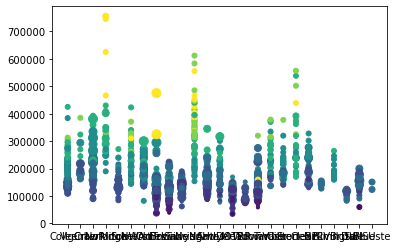

In [967]:
def scal_it(x_):
    return int(x_)**2

scat_data = train_xy[['OverallQual', 'SalePrice_real', 'Neighborhood', 'OverallCond']]
scat_data['x'] = scat_data['OverallQual'].apply(lambda x: scal_it(x))
scat_data['c'] = scat_data['OverallCond'].apply(lambda x: scal_it(x))

plt.scatter(data=scat_data, x='Neighborhood',c='x', s='c', y='SalePrice_real')#, c='Neighborhood')
#plt.plot(x=plot_scat['OverallQual'], y=plot_scat['SalePrice' ], color=plot_scat['Neighborhood'])


CollgCr


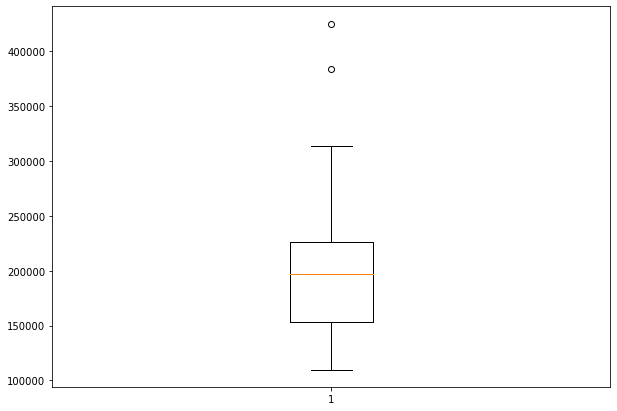

Veenker


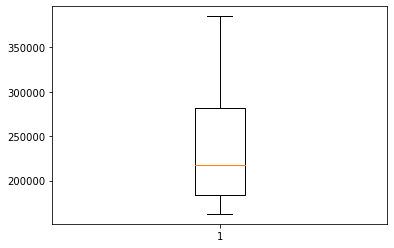

Crawfor


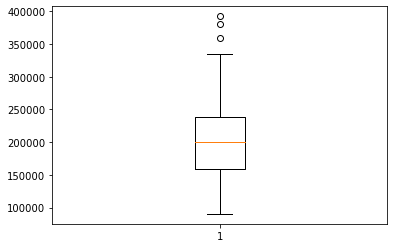

NoRidge


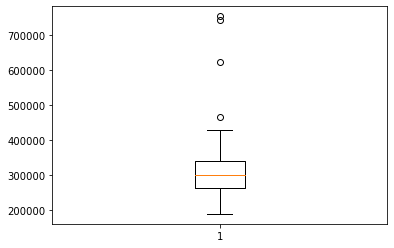

Mitchel


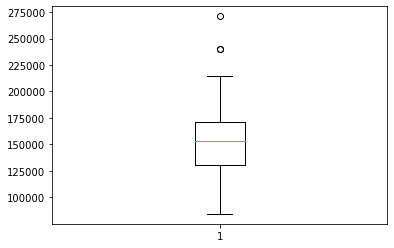

Somerst


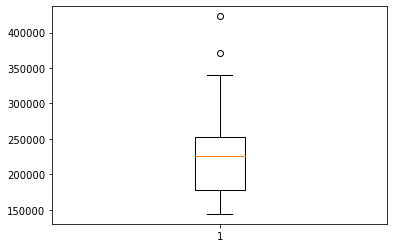

NWAmes


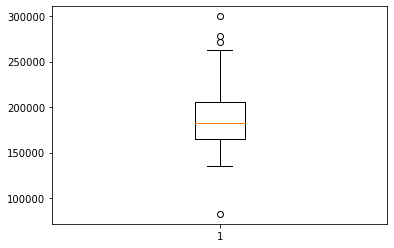

OldTown


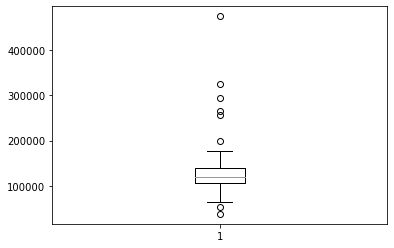

BrkSide


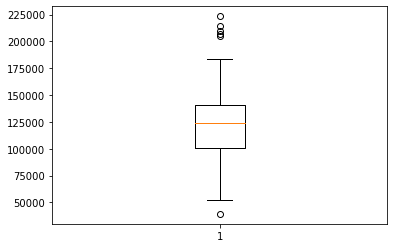

Sawyer


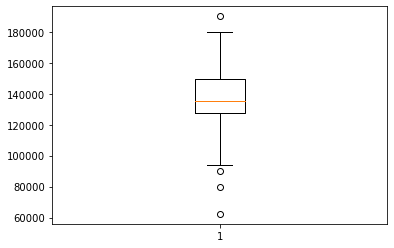

NridgHt


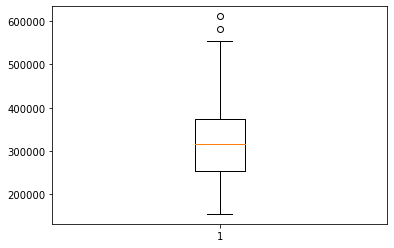

NAmes


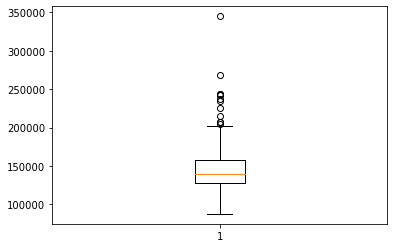

SawyerW


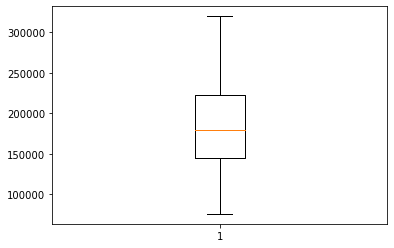

IDOTRR


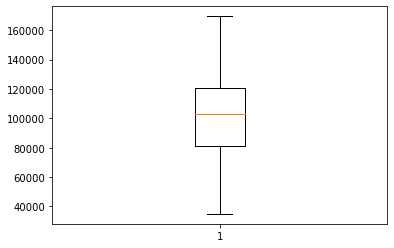

MeadowV


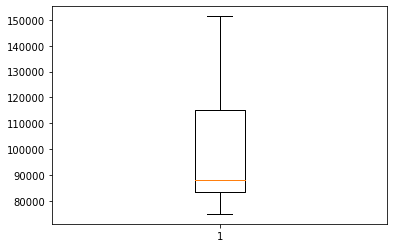

Edwards


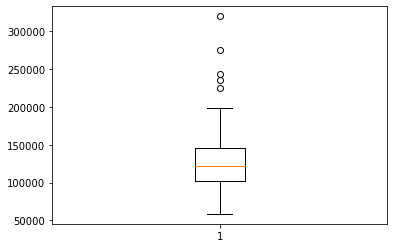

Timber


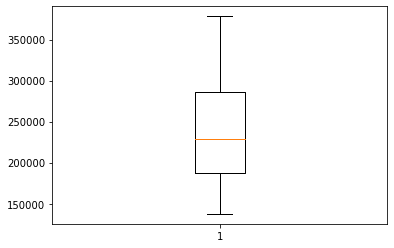

Gilbert


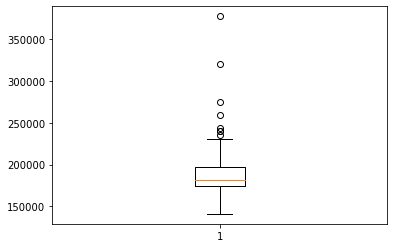

StoneBr


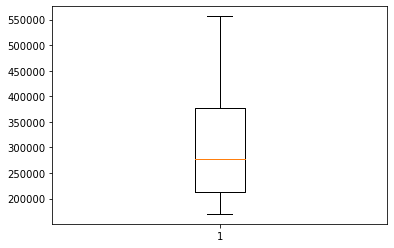

ClearCr


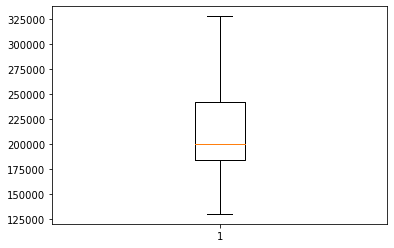

NPkVill


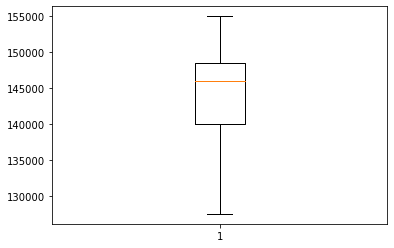

Blmngtn


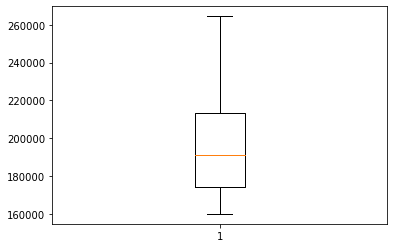

BrDale


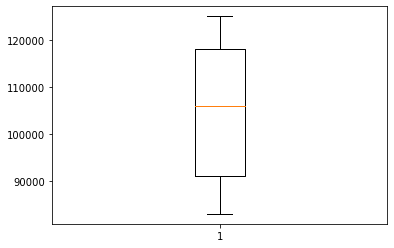

SWISU


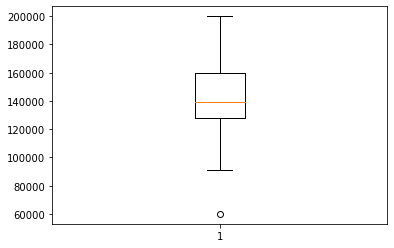

Blueste


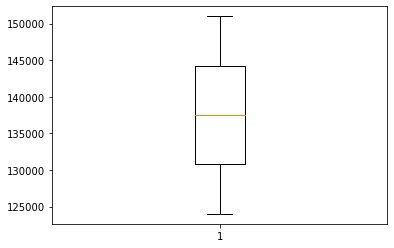

In [968]:
fig = plt.figure(figsize=(10,7))
for neigh_ in scat_data['Neighborhood'].unique():
    print(neigh_)
    plt.boxplot(scat_data.loc[scat_data['Neighborhood']==neigh_]['SalePrice_real'])
    plt.show()

    

<AxesSubplot:title={'center':'SalePrice_real'}, xlabel='Neighborhood'>

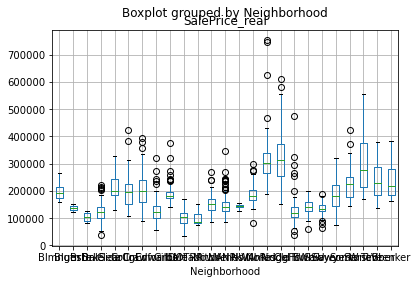

In [969]:
scat_data.boxplot(column='SalePrice_real', by='Neighborhood')

In [970]:
bp_data = scat_data[scat_data['Neighborhood']
                    .isin (['NAmes', 'CollgCr', 'OldTown', 'Edwards'])]
lst=[]
neigh = []
for neigh_ in bp_data['Neighborhood'].unique():
    print(neigh_)
    neigh.append(bp_data.loc[bp_data['Neighborhood']==neigh_]['SalePrice_real'])#, Neighborhood])

CollgCr
OldTown
NAmes
Edwards


In [971]:
neigh


[0       208500
 2       223500
 13      279500
 22      230000
 32      179900
          ...  
 1410    230000
 1422    136500
 1441    149300
 1444    179600
 1447    240000
 Name: SalePrice_real, Length: 150, dtype: int64,
 8       129900
 48      113000
 63      140000
 68       80000
 74      107400
          ...  
 1408    125500
 1416    122500
 1428    119000
 1432     64500
 1438    149700
 Name: SalePrice_real, Length: 113, dtype: int64,
 14      157000
 16      149000
 19      139000
 26      134800
 28      207500
          ...  
 1427    140000
 1435    174000
 1436    120500
 1450    136000
 1458    142125
 Name: SalePrice_real, Length: 225, dtype: int64,
 39       82000
 97       94750
 98       83000
 110     136900
 117     155000
          ...  
 1384    105000
 1423    274970
 1448    112000
 1452    145000
 1459    147500
 Name: SalePrice_real, Length: 100, dtype: int64]

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


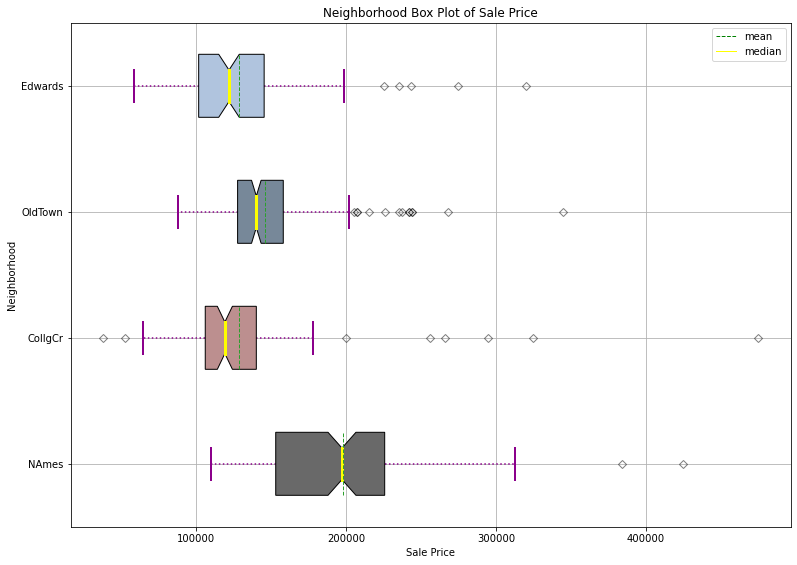

In [972]:
fig, ax = plt.subplots(figsize=(10,7)) 
#ax = fig.add_subplot(111) 
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(neigh, patch_artist=True,
               notch = "True", vert=0, showmeans=True, meanline=True, widths=0.5)
#bp = ax.boxplot(bp_data, column='SalePrice_real', by='Neighborhood', patch_artist=True, notch = "True", vert=0)
#bp = bp_data.boxplot(column='SalePrice_real', by='Neighborhood',patch_artist=True,
#               notch = "True", vert=0)
#ax = fig.add_axes([0, 0, 1, 1])
colors = ['dimgrey', 'rosybrown',  
          'lightslategray', 'lightsteelblue'] 
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color)
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":")
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
    
    # changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='yellow', 
               linewidth = 3)
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
# x-axis labels 
col_ = ['NAmes', 'CollgCr', 'OldTown', 'Edwards']
ax.set_yticklabels(col_)#['data_1'])#, 'data_2',  
                    #'data_3', 'data_4']) 
 #
color_ = 'Black'
#for ax in axes:
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_yticks([y+1 for y in range(len(col_)*2)])
ax.set_xlabel('Sale Price', color=color_)
ax.set_ylabel('Neighborhood', color=color_)
#
# Adding title  
plt.title("Neighborhood Box Plot of Sale Price", color=color_) 
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
ax.tick_params(colors='black')

plt.plot([], [], '--', linewidth=1, color='green', label='mean')
plt.plot([], [], '-', linewidth=1, color='yellow', label='median')
fig.tight_layout()
plt.legend()

fig.savefig('neigh_boxplot.png', bbox_inches='tight')
plt.show()

In [973]:
# Buy Low
print(train_xy.loc[train_xy['Neighborhood']=='NAmes'][['Neighborhood','SalePrice_real', 'OverallQual']]
      .dropna().round())
#CategoricalDtype

print(train_xy.loc[train_xy['Neighborhood']=='NAmes'][['Neighborhood','SalePrice_real', 'OverallQual']]
      .groupby('OverallQual').agg({'OverallQual':'count', 'SalePrice_real': 'mean'}).dropna().round())

     Neighborhood  SalePrice_real OverallQual
14          NAmes          157000           6
16          NAmes          149000           6
19          NAmes          139000           5
26          NAmes          134800           5
28          NAmes          207500           5
...           ...             ...         ...
1427        NAmes          140000           5
1435        NAmes          174000           6
1436        NAmes          120500           4
1450        NAmes          136000           5
1458        NAmes          142125           5

[225 rows x 3 columns]
             OverallQual  SalePrice_real
OverallQual                             
3                      3         91300.0
4                     20        114855.0
5                    113        136949.0
6                     74        155057.0
7                     12        203933.0
8                      3        282667.0


In [974]:
for k,v in sort_dict(val).items():
    print(k,v)
    count_.append(k)
    print(train_xy.loc[train_x['Neighborhood']=='CollgCr'][['Neighborhood','SalePrice_real', k]].groupby(k, dropna=True)
          .agg({k:'count', 'SalePrice_real': 'mean'}))#count())
    print(train_raw.loc[train_x['Neighborhood']=='CollgCr'][['Neighborhood','SalePrice', k]].groupby(k)
          .agg({k:'count', 'SalePrice': 'mean'}))
print('*'*100)



#for k, val_ in  

FullBath 0.06800302439623424
          FullBath  SalePrice_real
FullBath                          
0                0             NaN
1               38   137334.210526
2              111   216678.342342
3                1   424870.000000
          FullBath      SalePrice
FullBath                         
1               38  137334.210526
2              111  216678.342342
3                1  424870.000000
OverallQual 0.06383178424393354
             OverallQual  SalePrice_real
OverallQual                             
1                      0             NaN
10                     0             NaN
2                      0             NaN
3                      0             NaN
4                      1   123600.000000
5                     28   134858.928571
6                     24   170100.916667
7                     71   209840.154930
8                     23   259875.782609
9                      3   279000.000000
             OverallQual      SalePrice
OverallQual                

             OpenPorchSF      SalePrice
OpenPorchSF                            
0                     44  149988.068182
18                     1  189000.000000
20                     2  206520.500000
22                     1  176432.000000
23                     1  200000.000000
...                  ...            ...
170                    1  274300.000000
184                    2  309485.000000
211                    1  237000.000000
234                    1  213000.000000
262                    1  232000.000000

[68 rows x 2 columns]
****************************************************************************************************


In [975]:
X_t_encoded

,"LotArea_(10766.0, 12799.667]","LotArea_(12799.667, 215245.0]","LotArea_(1299.999, 6405.0]","LotArea_(6405.0, 8400.0]","LotArea_(8400.0, 9478.5]","LotArea_(9478.5, 10766.0]",LotShape_0,LotShape_1,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1871.999, 1940.0]","YearBuilt_(1940.0, 1960.0]","YearBuilt_(1960.0, 1973.0]","YearBuilt_(1973.0, 1994.0]","YearBuilt_(1994.0, 2004.0]","YearBuilt_(2004.0, 2010.0]",MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,"MasVnrArea_(-0.001, 93.333]","MasVnrArea_(243.833, 1600.0]","MasVnrArea_(93.333, 243.833]",ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_0,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,"1stFlrSF_(1087.0, 1266.0]","1stFlrSF_(1266.0, 1535.833]","1stFlrSF_(1535.833, 4692.0]","1stFlrSF_(333.999, 816.0]","1stFlrSF_(816.0, 948.333]","1stFlrSF_(948.333, 1087.0]","2ndFlrSF_(-0.001, 600.0]","2ndFlrSF_(600.0, 846.0]","2ndFlrSF_(846.0, 2065.0]","GrLivArea_(1026.0, 1242.667]","GrLivArea_(1242.667, 1464.0]","GrLivArea_(1464.0, 1664.667]","GrLivArea_(1664.667, 1958.0]","GrLivArea_(1958.0, 5642.0]","GrLivArea_(333.999, 1026.0]",FullBath_0,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,HalfBath_2,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_1,KitchenQual_2,KitchenQual_3,KitchenQual_4,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,PavedDrive_N,PavedDrive_P,PavedDrive_Y,"OpenPorchSF_(-0.001, 25.0]","OpenPorchSF_(25.0, 50.0]","OpenPorchSF_(50.0, 98.0]","OpenPorchSF_(98.0, 547.0]",Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,"MiscVal_(-0.001, 15500.0]",MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1

#Neighborhood Houses Sold <a name='neighborhood_houses_sold' />

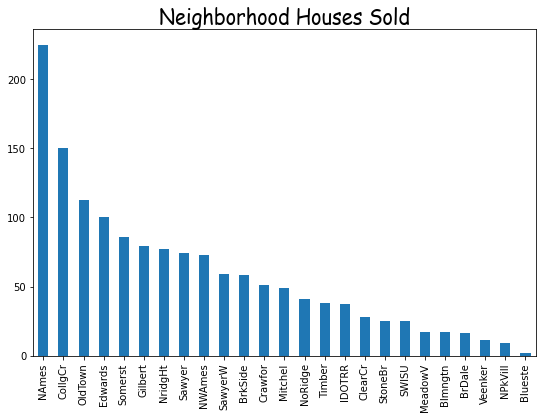

In [976]:
fig = plt.figure()
ax=train_raw['Neighborhood'].value_counts().plot(kind = 'bar',  
                                                  figsize=(9,6)) #.sort_index() after counts()
ax.set_title('Neighborhood Houses Sold', fontname='Comic Sans MS', fontsize=20)
fig.savefig('house_sold_by_neighborhood.png')

In [977]:
train_xy

,MSZoning,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,Heating,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,OpenPorchSF,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,SalePrice_real
0,RL,"(8400.0, 9478.5]",1,Lvl,CollgCr,1Fam,2Story,7,5,"(1994.0, 2004.0]",BrkFace,"(93.333, 243.833]",Gd,0,PConc,3,2,GasA,Y,"(816.0, 948.333]","(846.0, 2065.0]","(1664.667, 1958.0]",2,1,3,1,3,8,0,0,Attchd,RFn,2,2,2,Y,"(50.0, 98.0]",NA,NA,"(-0.001, 15500.0]",2,2008,8,208500
1,RL,"(9478.5, 10766.0]",1,Lvl,Veenker,1Fam,1Story,6,8,"(1973.0, 1994.0]",None,"(-0.001, 93.333]",TA,0,CBlock,3,2,GasA,Y,"(1087.0, 1266.0]","(-0.001, 600.0]","(1242.667, 1464.0]",2,0,3,1,2,6,1,2,Attchd,RFn,2,2,2,Y,"(-0.001, 25.0]",NA,NA,"(-0.001, 15500.0]",5,2007,7,181500
2,RL,"(10766.0, 12799.667]",0,Lvl,CollgCr,1Fam,2Story,7,5,"(1994.0, 2004.0]",BrkFace,"(93.333, 243.833]",Gd,0,PConc,3,2,GasA,Y,"(816.0, 948.333]","(846.0, 2065.0]","(1664.667, 1958.0]",2,1,3,1,3,6,1,2,Attchd,RFn,2,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",9,2008,8,223500
3,RL,"(9478.5, 10766.0]",0,Lvl,Crawfor,1Fam,2Story,7,5,"(1871.999, 1940.0]",None,"(-0.001, 93.333]",TA,0,BrkTil,2,3,GasA,Y,"(948.333, 1087.0]","(600.0, 846.0]","(1664.667, 1958.0]",1,0,3,1,3,7,1,3,Detchd,Unf,3,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",2,2006,5,140000
4,RL,"(12799.667, 215245.0]",0,Lvl,NoRidge,1Fam,2Story,8,5,"(1994.0, 2004.0]",BrkFace,"(243.833, 1600.0]",Gd,0,PConc,3,2,GasA,Y,"(1087.0, 1266.0]","(846.0, 2065.0]","(1958.0, 5642.0]",2,1,4,1,3,9,1,2,Attchd,RFn,3,2,2,Y,"(50.0, 98.0]",NA,NA,"(-0.001, 15500.0]",12,2008,9,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,"(6405.0, 8400.0]",1,Lvl,Gilbert,1Fam,2Story,6,5,"(1994.0, 2004.0]",None,"(-0.001, 93.333]",TA,0,PConc,3,2,GasA,Y,"(948.333, 1087.0]","(600.0, 846.0]","(1464.0, 1664.667]",2,1,3,1,2,7,1,2,Attchd,RFn,2,2,2,Y,"(25.0, 50.0]",NA,NA,"(-0.001, 15500.0]",8,2007,6,175000
1456,RL,"(12799.667, 215245.0]",1,Lvl,NWAmes,1Fam,1Story,6,6,"(1973.0, 1994.0]",Stone,"(93.333, 243.833]",TA,0,CBlock,3,2,GasA,Y,"(1535.833, 4692.0]","(-0.001, 600.0]","(1958.0, 5642.0]",2,0,3,1,2,7,2,2,Attchd,Unf,2,2,2,Y,"(-0.001, 25.0]",MnPrv,NA,"(-0.001, 15500.0]",2,2010,8,210000
1457,RL,"(8400.0, 9478.5]",1,Lvl,Crawfor,1Fam,2Story,7,9,"(1940.0, 1960.0]",None,"(-0.001, 93.333]",Ex,0,Stone,2,3,GasA,Y,"(1087.0, 1266.0]","(846.0, 2065.0]","(1958.0, 5642.0]",2,0,4,1,3,9,2,3,Attchd,RFn,1,2,2,Y,"(50.0, 98.0]",GdPrv,Shed,"(-0.001, 15500.0]",5,2010,10,266500
1458,RL,"(9478.5, 10766.0]",1,Lvl,NAmes,1Fam,1Story,5,6,"(1940.0, 1960.0]",None,"(-0.001, 93.333]",TA,0,CBlock,2,2,GasA,Y,"(948.333, 1087.0]","(-0.001, 600.0]","(1026.0, 1242.667]",1,0,2,1,3,5,0,0,Attchd,Unf,1,2,2,Y,"(-0.001, 25.0]",NA,NA,"(-0.001, 15500.0]",4,2010,5,142125


In [978]:
scat_data

,OverallQual,SalePrice_real,Neighborhood,OverallCond,x,c
0,7,208500,CollgCr,5,49,25
1,6,181500,Veenker,8,36,64
2,7,223500,CollgCr,5,49,25
3,7,140000,Crawfor,5,49,25
4,8,250000,NoRidge,5,64,25
...,...,...,...,...,...,...
1455,6,175000,Gilbert,5,36,25
1456,6,210000,NWAmes,6,36,36
1457,7,266500,Crawfor,9,49,81
1458,5,142125,NAmes,6,25,36


In [979]:
def rolling_mean(df_col):
    return df_col.rolling_mean(window=90).mean()




def get_plot():
    for i, neigh_ in enumerate(FOUR_NEIGHBORHOODS):
        df_ = (four_neigh_group.loc[four_neigh_group['Neighborhood']==neigh_]
                .groupby(['Date']).agg({'SalePrice_real': 'mean'}).round().reset_index()
              )
        df_['Rolling_60'] = df_.rolling(4).mean().shift(-2)
        
        plt.plot(df_['Rolling_60'],
            label=neigh_,
            color = colors[i],
            linewidth=3)

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


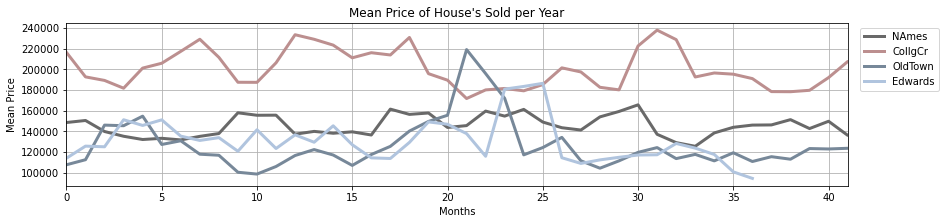

0      2008-02-01
2      2008-09-01
8      2008-04-01
13     2007-08-01
14     2008-05-01
          ...    
1448   2007-05-01
1450   2009-09-01
1452   2006-05-01
1458   2010-04-01
1459   2008-06-01
Name: Date, Length: 588, dtype: datetime64[ns]


In [980]:
FOUR_NEIGHBORHOODS = ['NAmes', 'CollgCr', 'OldTown', 'Edwards']
four_neigh_group = train_xy[train_xy['Neighborhood'].isin(FOUR_NEIGHBORHOODS)]
four_neigh_group['dateInt']=four_neigh_group['YrSold'].astype(str) + four_neigh_group['MoSold'].astype(str).str.zfill(2)+ '1'.zfill(2)
four_neigh_group['Date'] = pd.to_datetime(four_neigh_group['dateInt'], format='%Y%m%d')
four_neigh_group['Date']
plt.figure(figsize=(14,3))
fig.tight_layout()
for i, neigh_ in enumerate(FOUR_NEIGHBORHOODS):
    df_ = (four_neigh_group.loc[four_neigh_group['Neighborhood']==neigh_]
            .groupby(['Date']).agg({'SalePrice_real': 'mean'}).round().reset_index()
          )
    df_['Rolling_3_months'] = df_.rolling(3).mean().shift(-2)

    plt.plot(df_['Rolling_3_months'],
        label=neigh_,
        color = colors[i],
        linewidth=3)

#plt.xticks(np.arange(0,36))#, step=6))
plt.xlabel('Months') 
plt.ylabel('Mean Price')
plt.title("Mean Price of House's Sold per Year")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.5)
plt.grid('True')
#plt.axis([0,41])
plt.xlim(0,41)
plt.savefig('Mean_price_3_mon_rolling.png')
plt.show()#.plot.line())
#four_neigh_group.groupby(['YrSold', 'Neighborhood']).agg({'SalePrice_real':'mean'}).plot.line(y='SalePrice_real',by='Neighborhood')
#for neigh_ i

print(four_neigh_group['Date'])

In [981]:
print(four_neigh_group['Neighborhood'].unique)#.groupby('Neighborhood')['SalePrice_real'])

<bound method Series.unique of 0       CollgCr
2       CollgCr
8       OldTown
13      CollgCr
14        NAmes
         ...   
1448    Edwards
1450      NAmes
1452    Edwards
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 588, dtype: category
Categories (25, object): ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', ..., 'Somerst', 'StoneBr', 'Timber', 'Veenker']>


In [982]:
for neigh_ in bp_data['Neighborhood'].unique():
    print(neigh_)
    neigh.append(bp_data.loc[bp_data['Neighborhood']==neigh_][['SalePrice_real', 'YrSold']])

CollgCr


KeyError: "['YrSold'] not in index"

In [983]:
NAmes=train_xy.loc[train_xy['Neighborhood']=='NAmes']

In [984]:
def group_it(df, grps):
    return df.groupby(grps).agg({'SalePrice_real':['count', 'mean']}).round().dropna()

In [985]:
group_it(NAmes, 'BedroomAbvGr')

SalePrice_real          
                      count      mean
BedroomAbvGr                         
1                         2  139500.0
2                        57  129410.0
3                       131  145588.0
4                        28  176939.0
5                         3  177100.0
6                         4  150650.0

In [986]:
train_xy.groupby('SalePrice').agg({'SalePrice_real':['count', 'mean']}).round()

SalePrice_real          
                   count      mean
SalePrice                         
0                      0       NaN
1                      5   37482.0
2                     23   64469.0
3                    103   90276.0
4                    226  117798.0
5                    295  140972.0
6                    248  168242.0
7                    162  192450.0
8                    115  219437.0
9                     84  243911.0
10                    63  270244.0
11                    31  294398.0
12                    38  320460.0
13                    16  345312.0
14                    17  376385.0
15                    11  399464.0
16                     6  426054.0
17                     4  444248.0
18                     4  472875.0
19                     1  501837.0
20                     1  538000.0
21                     2  555790.0
22                     1  582933.0
23                     1  611657.0
24                     1  625000.0
25                     0       NaN
26                     0       NaN
27                     0       NaN
28                     1  745000.0
29                     1  755000.0
30                     0       NaN

Left off here <a name='bookmark' />

In [987]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Age of the captain'), IntSlider(value=40, max=60, min=40)), layout=La…

In [ ]:
#print(train_x)
agg_data = pd.DataFrame()
tup = []
for val_ in ['OverallQual','OverallCond', 'HouseStyle', 'ExterQual', 'LotArea', 'Foundation',         'TotRmsAbvGrd', 'BsmtCond']:
    
    NAames_agg = (train_xy.loc[train_xy['Neighborhood'].isin(col_)]#['NAmes'])]
          [['Neighborhood', val_, 'SalePrice_real']]
          .groupby(val_).agg({'SalePrice_real': ['count','mean', 'min', 'max'] }).round()
         ).reset_index()
    for i,v in enumerate(NAames_agg[('SalePrice_real', 'count')]):#, ('SalePrice_real', 'mean')]):
        if v > 0:
            
            
            w=(NAames_agg[('SalePrice_real', 'mean')][i])
            x=(NAames_agg[('SalePrice_real', 'min')][i])
            y=(NAames_agg[('SalePrice_real', 'max')][i])
            j=(NAames_agg[val_][i])
            new_val = val_ + j
            
            tup.append([val_, j, v, w, x, y, y-x])
    df = pd.DataFrame(tup, columns=['factor', 'value', 'count', 'mean_price', 'min', 'max', 'dif'])
    #pd.MultiIndex.from_frame(df)

        #if v.loc[[('SalePrice_real', 'count')] > 0]:
         #   print(NAames_agg[v])

print(df)